# Сборный проект 

В нашем распоряжении данные за 2016 год  по компьютерным играм в интернет-магазине «Стримчик». Цель: выявить определяющие успешность игры закономерности. Это позволит сделать ставку на потенциально популярный продукт и спланировать рекламные кампании. 

##  Изучение общей информации

Начнем анализ. Откроем файл и изучим данные

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [2]:
data=pd.read_csv('/datasets/games.csv')
data.head(30)

,Name,Platform,Year_of_Release,Genre,NA_sales,EU_sales,JP_sales,Other_sales,Critic_Score,User_Score,Rating
0,Wii Sports,Wii,2006.0,Sports,41.36,28.96,3.77,8.45,76.0,8,E
1,Super Mario Bros.,NES,1985.0,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN
2,Mario Kart Wii,Wii,2008.0,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E
3,Wii Sports Resort,Wii,2009.0,Sports,15.61,10.93,3.28,2.95,80.0,8,E
4,Pokemon Red/Pokemon Blue,GB,1996.0,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN
5,Tetris,GB,1989.0,Puzzle,23.20,2.26,4.22,0.58,NaN,NaN,NaN
6,New Super Mario Bros.,DS,2006.0,Platform,11.28,9.14,6.50,2.88,89.0,8.5,E
7,Wii Play,Wii,2006.0,Misc,13.96,9.18,2.93,2.84,58.0,6.6,E
8,New Super Mario Bros. Wii,Wii,2009.0,Platform,14.44,6.94,4.70,2.24,87.0,8.4,E
9,Duck Hunt,NES,1984.0,Shooter,26.93,0.63,0.28,0.47,NaN,NaN,NaN


Нам открылись данные о продажах игр, оценки пользователей и экспертов, жанры и платформы. 
Рассмотрим поподробнее названия колонок:

Name — название игры

Platform — платформа

Year_of_Release — год выпуска

Genre — жанр игры

NA_sales — продажи в Северной Америке (миллионы проданных копий)

EU_sales — продажи в Европе (миллионы проданных копий)

JP_sales — продажи в Японии (миллионы проданных копий)

Other_sales — продажи в других странах (миллионы проданных копий)

Critic_Score — оценка критиков (максимум 100)

User_Score — оценка пользователей (максимум 10)

Rating — рейтинг от организации ESRB (англ. Entertainment Software Rating Board).


In [3]:
#Изучим общую информацию
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16715 entries, 0 to 16714
Data columns (total 11 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Name             16713 non-null  object 
 1   Platform         16715 non-null  object 
 2   Year_of_Release  16446 non-null  float64
 3   Genre            16713 non-null  object 
 4   NA_sales         16715 non-null  float64
 5   EU_sales         16715 non-null  float64
 6   JP_sales         16715 non-null  float64
 7   Other_sales      16715 non-null  float64
 8   Critic_Score     8137 non-null   float64
 9   User_Score       10014 non-null  object 
 10  Rating           9949 non-null   object 
dtypes: float64(6), object(5)
memory usage: 1.4+ MB


Что мы видим, основные пропуски у нас в колонках Рейтинг и Оценка критиков/пользователей. Заполнить эти пропуски будет сложно, так как оценки зависят непосредственно от самой игры. Рейтинг также зависит от самой игры, а именно от решения ESRB, нам самим заполнить такие пропуски не получится.

Год выпуска указан в типе float64, а не datatime. Насколько это критично, пока не понятно, пропустим этот момент. 
Оценка пользователей в формате object, надо заменить на float64. Рейтинг указывается возрастной категорией(например, Е), поэтому тип данных object указан верно.

In [4]:
# Проверим дубликаты
data.duplicated().sum()

# Явных дубликатов не наблюдается.Проверка неявных дубликатов не имеет смысла

0

##  Подготовка данных

Заменим названия столбцов, поменяем данные на нужный тип, посмотрим дубликаты и уникальные значения. Возможно, после подробного изучения, мы сможем заменить некоторые пропуски.

### Замена названия столбцов

In [5]:
# Приводим к нижнему регистру названия всех колонок
data.columns = data.columns.str.lower()

# Поменяем object на float64 в колонке User_Score
# Код выдает ошибку: could not convert string to float: 'tbd'. Будем разбираться, что такое tbd

In [6]:
# Посмотрим на дубликаты и уникальные значения в столбце 'user_score'
data['user_score'].value_counts()

tbd    2424
7.8     324
8       290
8.2     282
8.3     254
       ... 
9.6       2
0.3       2
0.2       2
0         1
9.7       1
Name: user_score, Length: 96, dtype: int64

### Изменение типов данных 

Мы с вами обнаружили очень много значений tbd. TBD-To Be Determined, то есть «Будет определено». Так же, tbd может расшифровываться как To Be Deleted («будет удалено»). В игровой индустрии, этой аббревиатурой обозначают игры, рейтинг которых еще не определен. Сами мы не можем заполнить эти данные, так что для дальнейшей работы мы заменим это значение на NaN для удобства. 

In [7]:
# Поменяем значение 'tbd' на 'NaN'
data['user_score'] = data['user_score'].replace('tbd', 'NaN')

# Снова попробуем поменять object на float64 в колонке user_score
data['user_score'] = data['user_score'].astype('float64')
# Код сработал как надо
# Поменяем формат колонки year_of_release
data['year_of_release'] = data['year_of_release'].astype('Int64')

### Суммарные продажи во всех регионах

In [8]:
# Посчитаем суммарные продажи во всех регионах и запишем их в отдельный столбец total_sales
data['total_sales'] = data[['na_sales','eu_sales','jp_sales', 'other_sales']].sum(axis = 1)

In [9]:
data.head()

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
0,Wii Sports,Wii,2006,Sports,41.36,28.96,3.77,8.45,76.0,8.0,E,82.54
1,Super Mario Bros.,NES,1985,Platform,29.08,3.58,6.81,0.77,NaN,NaN,NaN,40.24
2,Mario Kart Wii,Wii,2008,Racing,15.68,12.76,3.79,3.29,82.0,8.3,E,35.52
3,Wii Sports Resort,Wii,2009,Sports,15.61,10.93,3.28,2.95,80.0,8.0,E,32.77
4,Pokemon Red/Pokemon Blue,GB,1996,Role-Playing,11.27,8.89,10.22,1.00,NaN,NaN,NaN,31.38


### Обработка пропусков

Посмотрим еще раз на пропуски в колонках name и genre. Их всего по 2 штуки. Узнаем, несут ли они какую-то важную информацию.

In [10]:
data[data['genre'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [11]:
data[data['name'].isna()] 

,name,platform,year_of_release,genre,na_sales,eu_sales,jp_sales,other_sales,critic_score,user_score,rating,total_sales
659,NaN,GEN,1993,NaN,1.78,0.53,0.00,0.08,NaN,NaN,NaN,2.39
14244,NaN,GEN,1993,NaN,0.00,0.00,0.03,0.00,NaN,NaN,NaN,0.03


In [12]:
# Пропусков в этих строках много,важной информации нет, так что смело удаляем.
data = data.dropna(subset=['name']).reset_index(drop=True)
data = data.dropna(subset=['genre']).reset_index(drop=True)

# Такая же ситуация и с колонкой год выпуска, там около 1,6% пропусков, можно удалить.
data = data.dropna(subset=['year_of_release']).reset_index(drop=True)

In [13]:
# Проверяем наши изменения
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16444 non-null  object 
 1   platform         16444 non-null  object 
 2   year_of_release  16444 non-null  Int64  
 3   genre            16444 non-null  object 
 4   na_sales         16444 non-null  float64
 5   eu_sales         16444 non-null  float64
 6   jp_sales         16444 non-null  float64
 7   other_sales      16444 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           9768 non-null   object 
 11  total_sales      16444 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


In [14]:
# Теперь разберемся с пропусками в колонках оценки
data['critic_score'].isna().sum()

8461

In [15]:
# Пропусков в 'critic_score' почти половина. Это много, удалить их просто так неполучится
# Посмотрим на пропуски в оценках пользователей
data['user_score'].isna().sum()

8981

In [16]:
# Ситуация такая же, больше половина пропусков. Разберемся с пропусками в колонках рейтинга
data['rating'].isna().sum()
# Пропусков также много, и, к сожалению, заполнить их непросто

6676

In [17]:
data['rating'].unique()

array(['E', nan, 'M', 'T', 'E10+', 'K-A', 'AO', 'EC', 'RP'], dtype=object)

In [18]:
# Рейтинг К-А это старая версия рейтинга Е
data['rating'] = data['rating'].replace('K-A', 'E')

Отдельная ситуация с возрастным рейтингом ESRB. Если посмотреть информацию, то можно понять, что данный рейтинг применяется в США и Канаде, а значит , что в eu_sales, jp_sales и other_sales рейтинг совсем другой, и именно поэтому появился пропуск в колонке  rating. 

In [19]:
# Используем "заглушку". Заменим все пропуски в колонках eu_sales, jp_sales и other_sales
data['rating'] = data['rating'].fillna(value='unknown')

In [20]:
# Проверяем изменения
data['rating'].isna().sum()

0

<b>Небольшой вывод:</b> Как мы с вами обнаружили, очень много пропусков в столбцах оценок( критиков и пользовательского), заполнить корректно эти данные мы не можем, так как рискнем испортить анализ, и удалить строки с пропусками мы не готовы, их больше половины. Удаление таких пропусков может привести к неожиданно плохому результату. Причины таких пропусков могут быть разные, игра еще не вышла, поэтому оценки не выставленны и рейтинг не определен.Возможно, была также и техническая ошибка( неправильное преобразование файла, кодировка и т.д.) Также мог присутствовать человечекий фактор.
Отдельно обратим внимание, что в колонце rating пропуски связаны с регионом выпуска игры. Данный рейтинг применяется только в США и Канаде, а значит будет стоять  только в na_sales. Поэтому мы заполнили пропуски unknown.

## Проведение исследовательского анализа данных

### Выпуск игр в разные годы

In [22]:
# Посмотрим, сколько игр выпускалось в разные годы,для этого сгруппируем данные
data.groupby('year_of_release')['name'].count()

year_of_release
1980       9
1981      46
1982      36
1983      17
1984      14
1985      14
1986      21
1987      16
1988      15
1989      17
1990      16
1991      41
1992      43
1993      60
1994     121
1995     219
1996     263
1997     289
1998     379
1999     338
2000     350
2001     482
2002     829
2003     775
2004     762
2005     939
2006    1006
2007    1197
2008    1427
2009    1426
2010    1255
2011    1136
2012     653
2013     544
2014     581
2015     606
2016     502
Name: name, dtype: int64

<AxesSubplot:>

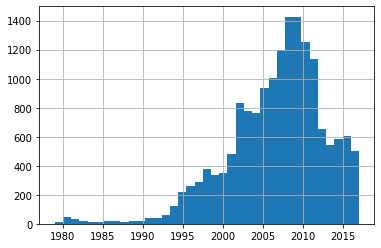

In [23]:
# Посмотрим теперь на эти данные в гистограмме для большей наглядности
data['year_of_release'].hist(bins=37, range=(1979,2017))

Итак, на гистограмме хорошо видно, что пик выпуска игр пришелся на период с 2002 по 2011 год. Для анализа нам пригодятся только данные с 2000 года, именно с этого момента начинается рост выпуска.

### Продажа игр на разных платформах

<AxesSubplot:xlabel='platform'>

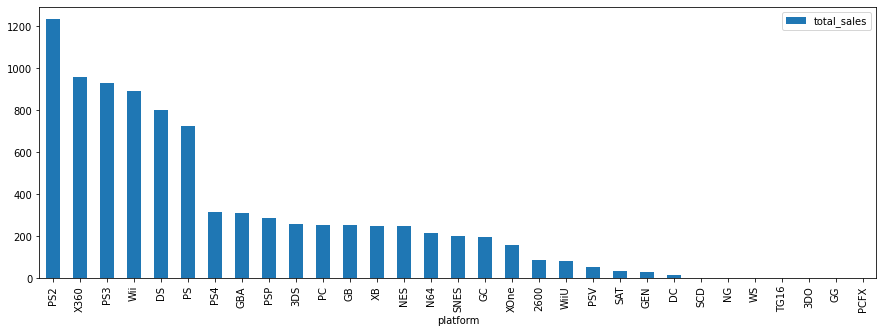

In [24]:
# Посмотрим, как обстоят дела с продажами игр на разных платформах
data_sales_platform=(
    data.pivot_table(index = 'platform', values = 'total_sales', aggfunc = 'sum')
    .sort_values(by = 'total_sales', ascending = False)    
)
data_sales_platform.plot(kind='bar', figsize=(15,5))

Как видно на графике, не все платформы отличаются высокими продажами. Выберем для нас самые показательные, а точнее ,отберем 10 самых продаваемых платформ.

<AxesSubplot:xlabel='platform'>

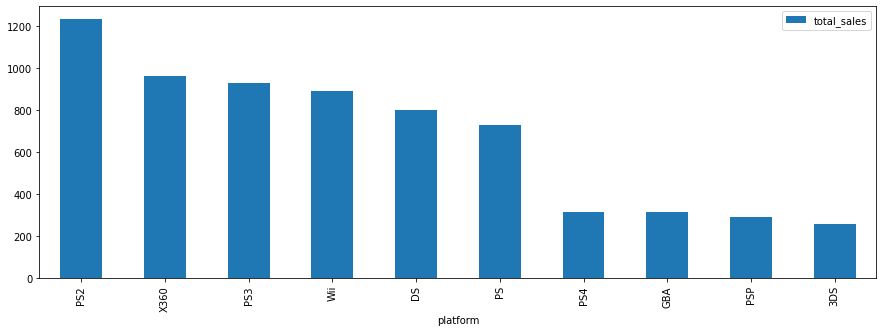

In [25]:
# Сбрасываем индексацию 
top10_platforms = data_sales_platform.reset_index()
# Отбираем 10 самых самых
iloc_top10_platforms = top10_platforms.iloc[0:10]
# Смотрим, какие платформы отобрали
top10_platforms = iloc_top10_platforms['platform'].unique()
# Построим график для наглядности
iloc_top10_platforms.plot(x="platform", y="total_sales", kind='bar', figsize=(15,5))

In [26]:
# При первом построении графиков мы обнаружили, что у платформы DS есть продажи в 1985 году,
# хотя консоль выпустилась только в 2004 году. Удалим этот выброс

data.loc[data['platform']=='DS'] = data.loc[(data['platform']=='DS') & (data['year_of_release']>= 2004)]


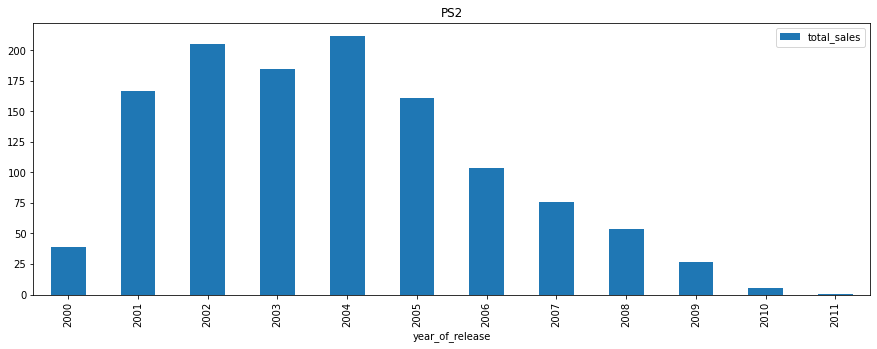

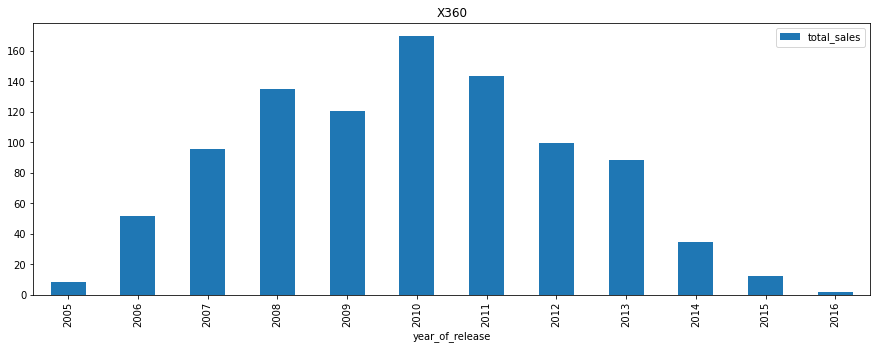

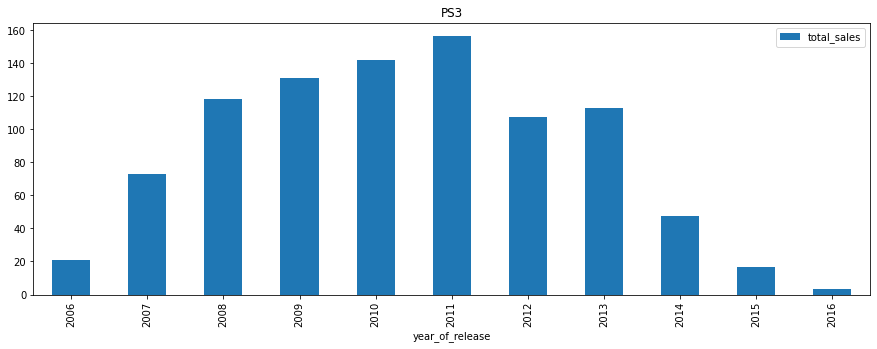

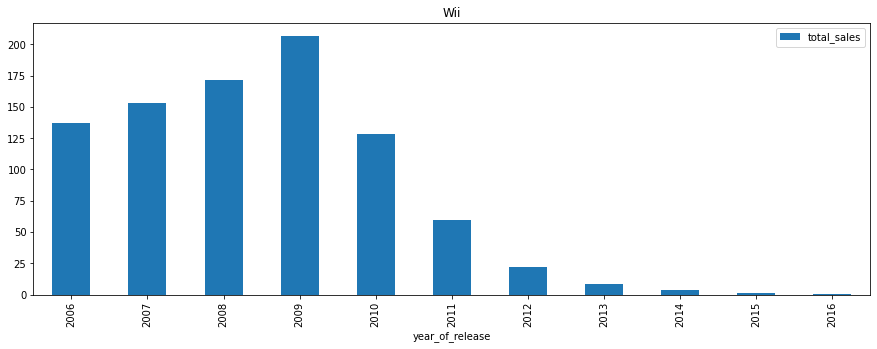

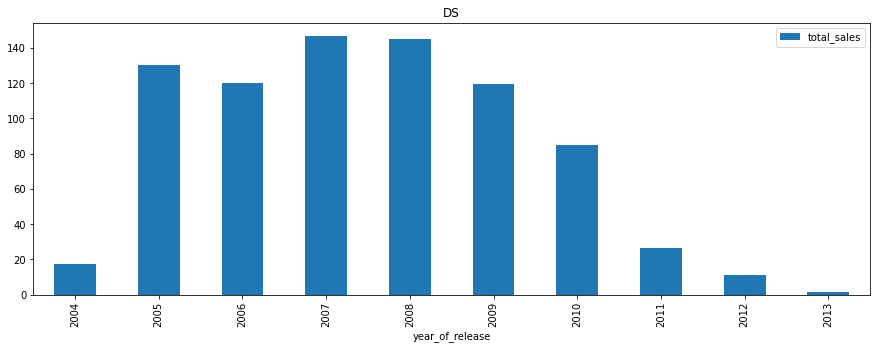

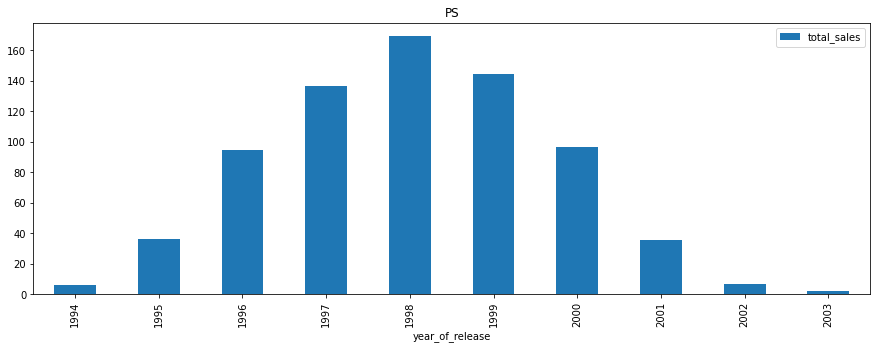

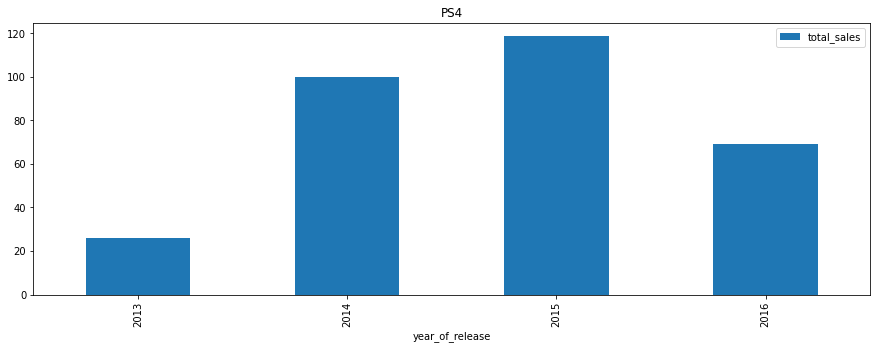

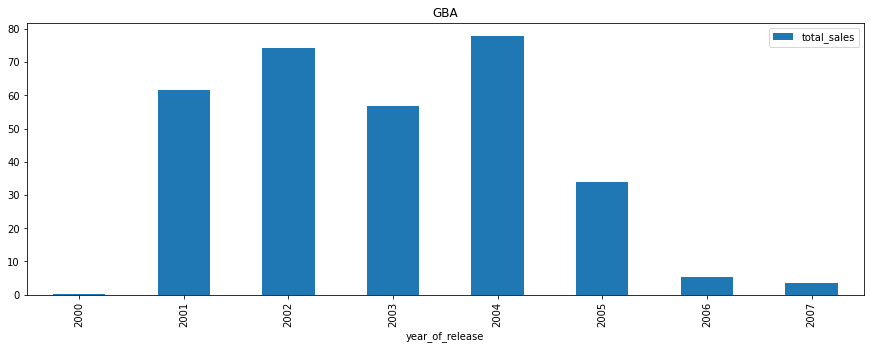

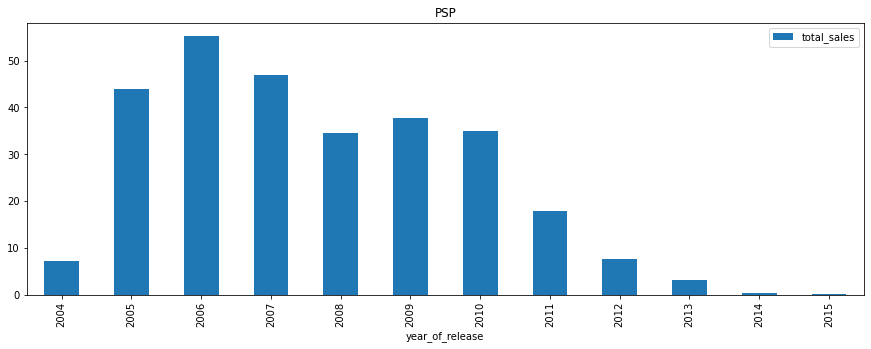

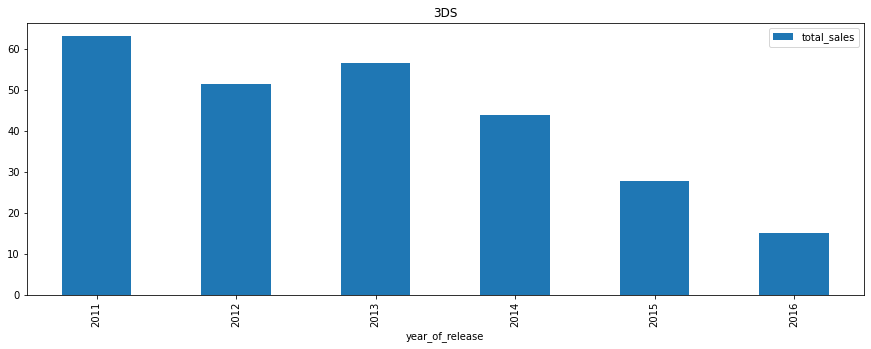

In [27]:
# Используем цикл для построения гистограммы для каждой платформы.
for plat in top10_platforms:
    (
        data[data['platform'] == plat]
        .pivot_table(index = 'year_of_release', values = 'total_sales', aggfunc = 'sum')
        .plot(kind = 'bar', figsize=(15,5))
    )
    plt.title(plat)

Глядя на полученные гистограммы, можно сделать несколько выводов.

Платформа РС выпускала игры на протяжении 24 года(1992-2016), 1985 и 1988 года похожи на выбросы, так как не являются показательными. Пик продаж приходится на период с 2007 по 2013 год. За такой долгий период продажи то росли,то падали. Это говорит о том, что владельцам платформы удается переодически возвращать к себе интерес( возможно, благодаря обновлениям).

Платформа PS имеет плавный рост продаж с 1994 года, к 1998 достигает своего пика и так же плавно идет на спад. в 2003 году продажы закончены. Это связано с обновлением данной платформы (PS2). 

Платформа PS2 также имела долгий период продаж игр (2000-2011). Его пиком был 2001-2004 года, с 2005 года продажи стали падать и к 2012 году совсем не осталось релиза игр на эту платформу. Виной тому послужило обновление данной платформы, ее мы рассмотрим далее.

Платформа PS3 является обновлением PS2, поэтому ее выпуск приходится на 2006 год. Пик продаж пришелся на 2007-2013 года, дальше идет резкий спад, опять же, причина в выходе нового обновления платформы.

Платформа Х360, появилась в продаже в 2005 году и быстро набирала популярность. Пик продаж приходится на 2010 год, затем идет плавный спад, и в 2016 году продажи минимальные.

Платформа PSP имела популярность с 2004 года( года выпуска самой платформы) и держала планку до 2010 года. Затем продажы стали падать и к 15-му году выпуск игр совсем прекратился.

Платформа Wii имела продажи с 2006 по 2016 год, с 2010 года идет резкий спад и последние 4 года продажи были минимальными. Судя по данным, в этой платформе больше не было заинтересованности.

Платформа DS выпускала игры с 2004 года и как у большинства платформ, уже со следующего года продажи достигли высоких показателей. Но к 2013 году выпуск снова прекратился.

Платформа GBA существовала 7 лет (2000-2007). с 2001 по 2004 год продажи достигли своего пика, и к 2007 году резко пошли на спад.

Платформа PS4 является самой "молодой", ее выпуск приходится всего на 2013 год. За все года своего существования, платформа держит хорошие показатели.


### Актуальный период

<b>Средний срок существования платформы около 7 лет, ее пик примерно 2-3года, у большинства пик продаж приходился на период 2010 года. По моему мнению, нужно за актуальный период взять последние 3 года(2012-2016). Этот отрезок времени для нас будет показательным для построения прогноза на 2017 год.</b>

Когда мы определились с актуальным периодом, можно работать с данными.

<AxesSubplot:xlabel='year_of_release'>

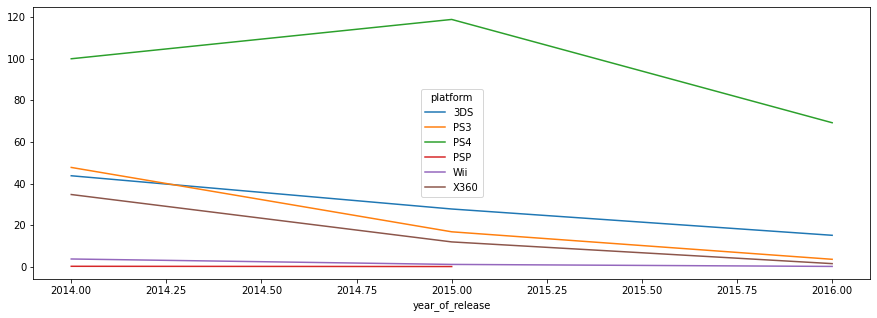

In [28]:
# Отберем нужные нам года
actual_years=data.query('year_of_release >= 2014')

# Строим для большей наглядности график продаж в актуальном периоде
(
    actual_years.query('platform in @top10_platforms')
    .pivot_table(index='year_of_release', values='total_sales', columns='platform', aggfunc='sum')
    .plot(figsize=(15,5))
)

Игры для всех платформ идут на снижение продаж, PSP и вовсе ушла с рынка в 2015 году Если судить по данному графику, то можно выявить потенциально прибыльные платформы: 

PS4-хоть она появилась недавно, но это делает ее самой новой и популярной моделью, что приводит к высоким продажам.

3DS - на момент 2016 года она была второй по уровню продаж

XOne-идет наравне с PS4 (пояснение ниже)

<AxesSubplot:>

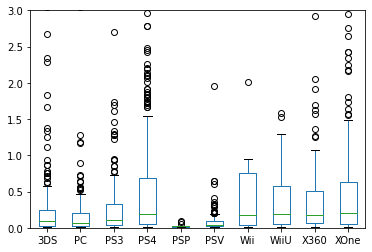

In [29]:
# Построим график "Ящик с усами"
(
    actual_years.pivot_table(index='name', values='total_sales', columns='platform', aggfunc='sum')
    .plot(kind='box', ylim=(0,3))
)

<AxesSubplot:>

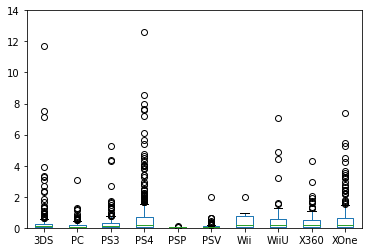

In [30]:
# Увеличим обзор
(
    actual_years.pivot_table(index='name', values='total_sales', columns='platform', aggfunc='sum')
    .plot(kind='box', ylim=(0,14))
)

После построения другого графика, картина поменялась. У нас появилась в актуальном периоде новые платформы XOne и WiiU. У XOne медиана почти совпадает с медианой PS4, что говорит о высоких продажах, и это за небольшой период существования( является обновлением Х360). На предыдущем графике ее не было, поэтому не заметили эту платформу раньше, но тоже внесем ее в список потенциально продаваемых, вместо очевидно на первый взгляд платформы PS3.
Аналогичная ситуация и с WiiU. Не сразу можно было ее увидеть на графике, а она по продажам обгоняет 3DS. Тоже внесем ее в список. Если еще обратить внимание на "выбросы", можно заметить, что максимум продаж самый большой у PS4 и 3DS.

### Анализ продаж

Посмотрим, как влияют на продажи внутри одной популярной платформы отзывы пользователей и критиков. Для этого построим диаграмму рассеивания и посчитаем корреляцию. Так как данные за 2016 год неполные, адекватная оценка не предоставляется возможной. Но все таки просмотреть общую картину зависимости мы с вами попытаемся. Будем надеятся, что предыдущие года перекроют пропуски 2016 года.


Коэффицент корреляции для оценок пользователей - -0.04

Коэффицент корреляции для оценок критиков - 0.40


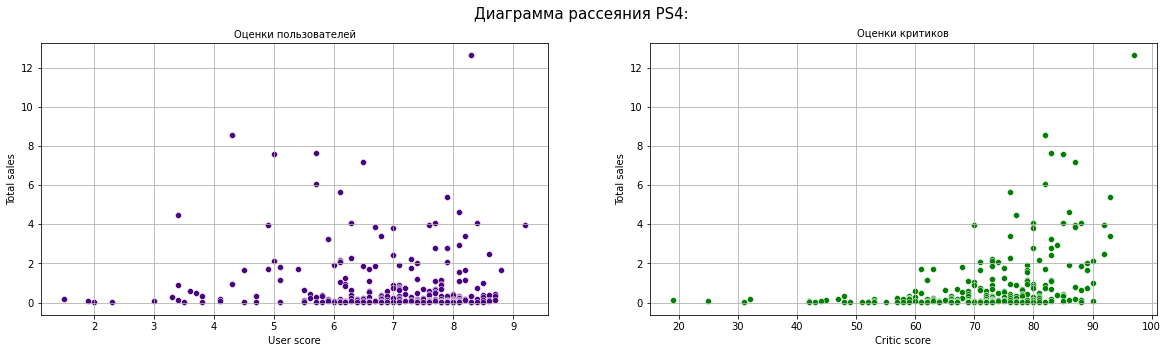

In [31]:
# Расмотрим зависимость у платформы PS4

ps_4 = actual_years[actual_years['platform']=='PS4']

cor_user = ps_4['total_sales'].corr(ps_4['user_score'])
cor_critic = ps_4['total_sales'].corr(ps_4['critic_score'])

print(f'\nКоэффицент корреляции для оценок пользователей - {cor_user:.2f}')
print(f'\nКоэффицент корреляции для оценок критиков - {cor_critic:.2f}')

plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеяния PS4:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Оценки пользователей', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=ps_4, color='indigo')
plt.ylabel('Total sales')
plt.xlabel('User score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Оценки критиков', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=ps_4, color='green')
plt.ylabel('Total sales')
plt.xlabel('Critic score')
plt.grid(True)

Вывод: На продажи никак не влияют оценки пользователей, коэффициент корреляции отрицательный. А оценки критиков имеют некоторое влияние-корреляция слабоположительная. Видимо для производителей более важно мнение экспертов.


Коэффицент корреляции для оценок пользователей - 0.41

Коэффицент корреляции для оценок критиков - 0.37


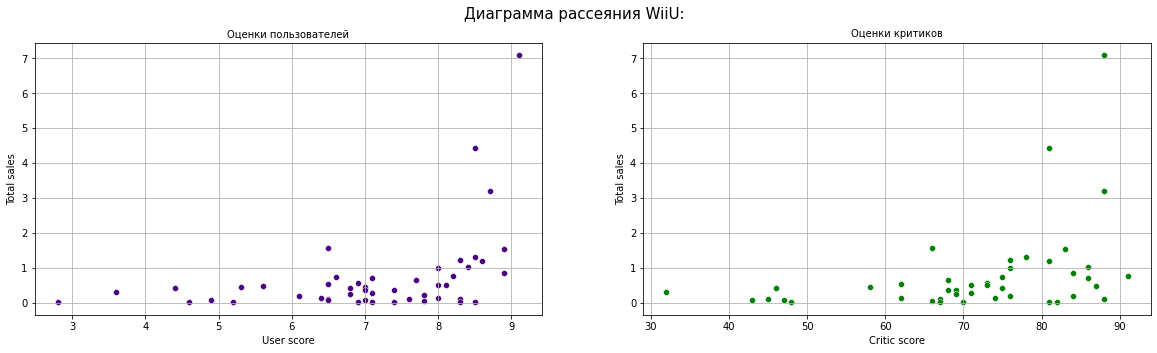

In [32]:
# Проверим теперь другие платформы
  
 # Расмотрим зависимость у платформы WiiU
wiiu = actual_years[actual_years['platform']=='WiiU']

cor_user = wiiu['total_sales'].corr(wiiu['user_score'])
cor_critic = wiiu['total_sales'].corr(wiiu['critic_score'])

print(f'\nКоэффицент корреляции для оценок пользователей - {cor_user:.2f}')
print(f'\nКоэффицент корреляции для оценок критиков - {cor_critic:.2f}')

plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеяния WiiU:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Оценки пользователей', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=wiiu, color='indigo')
plt.ylabel('Total sales')
plt.xlabel('User score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Оценки критиков', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=wiiu, color='green')
plt.ylabel('Total sales')
plt.xlabel('Critic score')
plt.grid(True)


Коэффицент корреляции для оценок пользователей - -0.07

Коэффицент корреляции для оценок критиков - 0.43


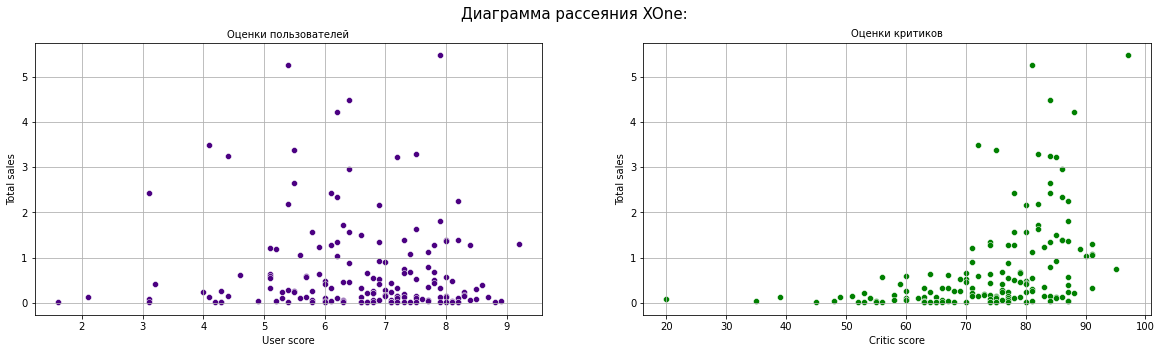

In [33]:
 # Расмотрим зависимость у платформы XOne
xone = actual_years[actual_years['platform']=='XOne']

cor_user = xone['total_sales'].corr(xone['user_score'])
cor_critic = xone['total_sales'].corr(xone['critic_score'])

print(f'\nКоэффицент корреляции для оценок пользователей - {cor_user:.2f}')
print(f'\nКоэффицент корреляции для оценок критиков - {cor_critic:.2f}')

plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеяния XOne:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Оценки пользователей', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=xone, color='indigo')
plt.ylabel('Total sales')
plt.xlabel('User score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Оценки критиков', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=xone, color='green')
plt.ylabel('Total sales')
plt.xlabel('Critic score')
plt.grid(True)


Коэффицент корреляции для оценок пользователей - 0.22

Коэффицент корреляции для оценок критиков - 0.31


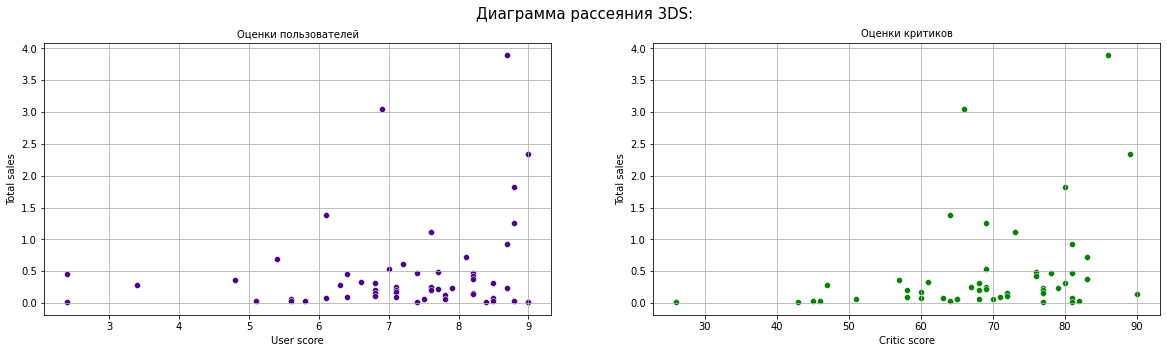

In [34]:
# Расмотрим зависимость у платформы 3DS
ds_3 = actual_years[actual_years['platform']=='3DS']

cor_user = ds_3['total_sales'].corr(ds_3['user_score'])
cor_critic = ds_3['total_sales'].corr(ds_3['critic_score'])

print(f'\nКоэффицент корреляции для оценок пользователей - {cor_user:.2f}')
print(f'\nКоэффицент корреляции для оценок критиков - {cor_critic:.2f}')

plt.figure(figsize=(20, 5))
plt.suptitle('Диаграмма рассеяния 3DS:', fontsize=15)

plt.subplot(1, 2, 1)
plt.title('Оценки пользователей', fontsize=10)
sns.scatterplot(x='user_score', y='total_sales', data=ds_3, color='indigo')
plt.ylabel('Total sales')
plt.xlabel('User score')
plt.grid(True)

plt.subplot(1, 2, 2)
plt.title('Оценки критиков', fontsize=10)
sns.scatterplot(x='critic_score', y='total_sales', data=ds_3, color='green')
plt.ylabel('Total sales')
plt.xlabel('Critic score')
plt.grid(True)

Несмотря на неполные данные, диаграмма рассеивания похожа на правду. Оценки критиков и пользователей в большинстве случаев совпадают, но все равно везде присутствует положительная корреляция только у оценки критиков. Исключениями являются платформы 3DS и WiiU( там слабоположительная корреляция и у критиков и у пользователей). Ранее мы проверили показатели у PS3, но кол-во данных слишком мало на актуальный период, и коеффициент корреляции был низок.

Итог такой, оценка критиков влияет(среднеположительно или мало) на продажи, но оценка пользователей имеет малое влияние( отрицательное). Также все зависит от кол-ва данных, так как данные за 16 год не полные,то и корреляция немного отличается от правды.

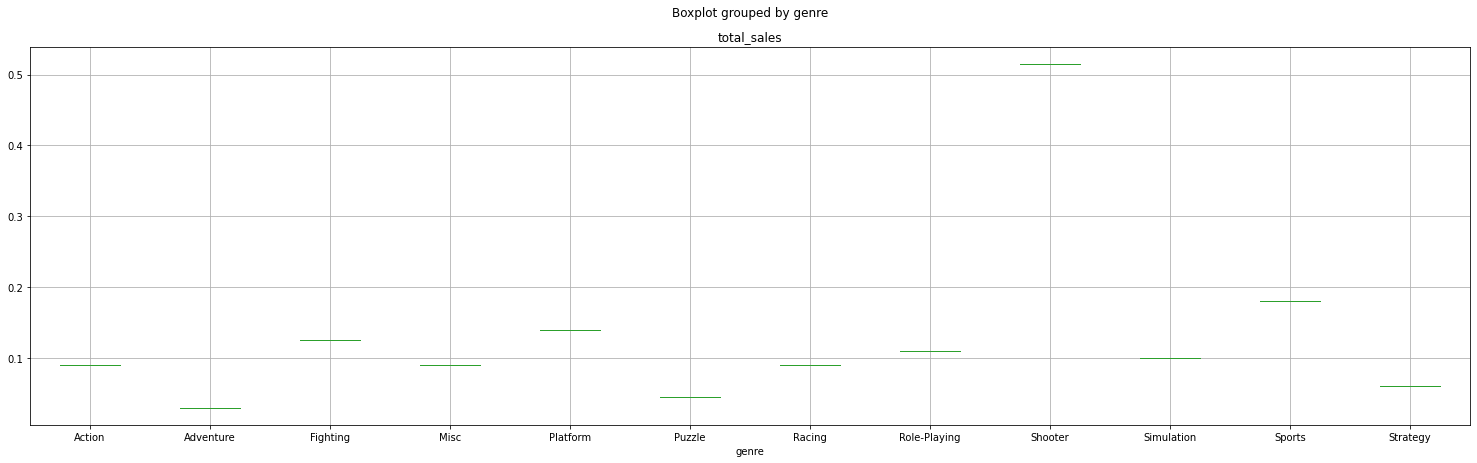

In [36]:
# Посмотрим на общее распределение игр по жанрам. 
(
    actual_years.pivot_table(index='genre', values='total_sales', aggfunc='median')
    .boxplot(column='total_sales', by='genre', figsize=(25,7))
)
plt.show()

<b>Небольшой вывод:</b> из нашего неполного анализа можно уже смело выявить лидеров продаж как по платформам, так и по жанрам. Самыми популярными платформами, как ни странно, являются более новые(PS4, XOne). Что касается жанров, то большую популярность имеют Shooter(с большим отрывом). Именно этот жанр приносит больше всего прибыли.

##  Составление портрета пользователя каждого региона

### Распределение продаж игр на разных платформах по регионам

In [37]:
# Посмотрим еще раз на наши данные
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 16444 entries, 0 to 16443
Data columns (total 12 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   name             16443 non-null  object 
 1   platform         16443 non-null  object 
 2   year_of_release  16443 non-null  Int64  
 3   genre            16443 non-null  object 
 4   na_sales         16443 non-null  float64
 5   eu_sales         16443 non-null  float64
 6   jp_sales         16443 non-null  float64
 7   other_sales      16443 non-null  float64
 8   critic_score     7983 non-null   float64
 9   user_score       7463 non-null   float64
 10  rating           16443 non-null  object 
 11  total_sales      16443 non-null  float64
dtypes: Int64(1), float64(7), object(4)
memory usage: 1.5+ MB


У нас есть 3 обозначенных региона: na, eu, jp. Определим для них популярные платформы и популярные жанры (топ-5) в актуальный период. Посмотрим, влияет ли рейтинг ESRB на продажи в отдельном регионе.

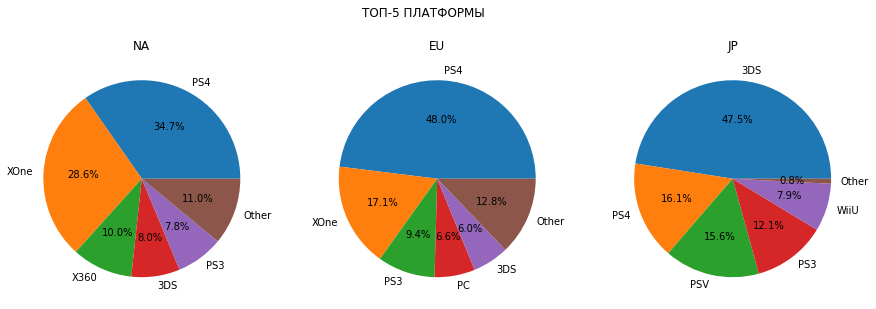

In [38]:
# Составим распределение продаж игр на разных платформах по регионам

# Задаем список регионов
top_5 = actual_years.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle('ТОП-5 ПЛАТФОРМЫ')
for i in range(3):
  # выберем 5 самых продающих платформ
  df_i = (actual_years.groupby('platform')[top_5[i]].sum().
             reset_index().
             sort_values(top_5[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальные продажи в Other
  df_i = df_i.append({'platform': 'Other', top_5[i]: actual_years[top_5[i]].sum() - df_i[top_5[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[top_5[i]], labels = df_i['platform'], autopct='%1.1f%%')

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()


Что можно сказать, в Топ-5 всех  3 регионов попали такие платформы, как PS4 и XOne. В Америке самой популярной оказалась PS4 и X360, в Европе платформа PS4, а в Японии 3DS. Это говорит о том, что каждый регион предпочитает платформу от "своего" производителя.

### Распределение продаж по регионам с разными жанрами

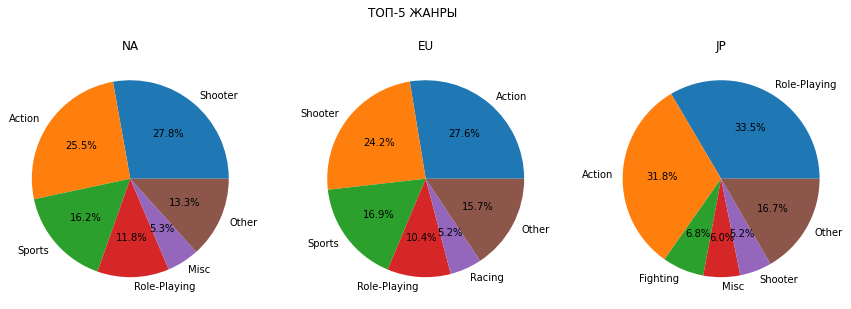

In [39]:
# Составим распределение продаж игр разных жанров по регионам

#Задаем список регионов
top_5_g = actual_years.columns[4:7]
# начертим круговую диаграмму для каждого региона
fig, axs = plt.subplots(1, 3, figsize=(15, 5))

fig.suptitle('ТОП-5 ЖАНРЫ')
for i in range(3):
  # выберем 5 самых продающих жанров
  df_i = (actual_years.groupby('genre')[top_5[i]].sum().
             reset_index().
             sort_values(top_5[i], ascending = False, ignore_index = True).
             head(5))
  # занесем все остальные продажи в Other
  df_i = df_i.append({'genre': 'Other', top_5[i]: actual_years[top_5[i]].sum() - df_i[top_5[i]].sum()}, ignore_index= True)
  axs[i].pie(df_i[top_5[i]], labels = df_i['genre'], autopct='%1.1f%%')

  # Зададим название региона.
  axs[i].set_title(df_i.columns[1].split('_')[0].upper())
plt.show()


В Европе и Америке популярными оказались Action, Shooter и Sports почти в равной степени. В Японии популярность имеет Role-Playing, но Action также присутствует. Эта страна всегда отличалась своими определенными вкусами и трендами, так что не удивительно, что их рейтинг отличается от других стран.

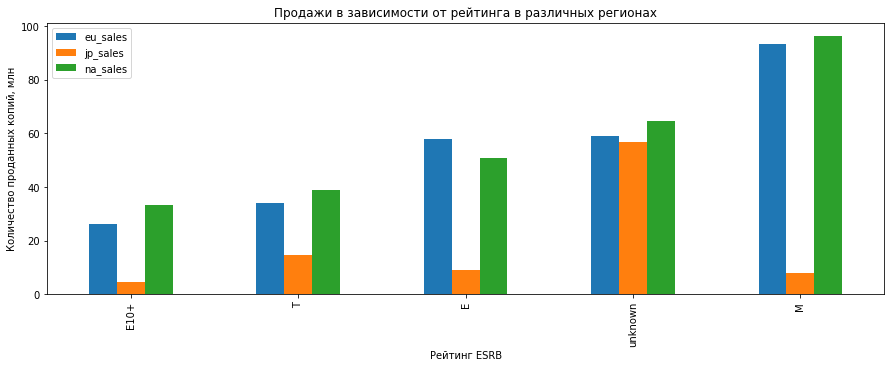

In [40]:
# Проверим, как зависят продажи в регионах от рейтинга ESRB

# Так как колонка 'rating' имеет категориальные данные, то мы не можем посмотреть
# зависимость обычной корреляцией
(
    actual_years.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .sort_values(by='na_sales')
    .plot(kind='bar', figsize=(15, 5))
)
plt.xlabel('Рейтинг ESRB')
plt.ylabel('Количество проданных копий, млн')
plt.title('Продажи в зависимости от рейтинга в различных регионах')
plt.show()

In [41]:
(
    actual_years.pivot_table(index='rating', values=['na_sales', 'eu_sales', 'jp_sales'], aggfunc='sum')
    .sort_values(by='na_sales')
)

,eu_sales,jp_sales,na_sales
rating,,,
E10+,26.16,4.46,33.23
T,34.07,14.78,38.95
E,58.06,8.94,50.74
unknown,58.95,56.90,64.72
M,93.44,8.01,96.42


Судя по таблице, рейтинг действительно влияет на продажи. Особенно пользуются популярностью игры с рейтингом М (Для взрослых). Не удивительно, именно эти игры самые интересные и насыщенные сценами. Но также много игр с не обозначенным рейтингом.

In [42]:
# Комментарий ревьюера
temp = actual_years.copy()
print(temp.rating.isna().sum(), temp.rating.isna().sum()/len(temp))
temp.rating.value_counts()

0 0.0


unknown    749
T          271
M          265
E          219
E10+       185
Name: rating, dtype: int64

<b>Небольшой вывод:</b>в разных регионах есть своя зависимость продаж от жанра, игровой платформы и рейтинга. Платформу берут в основном местного производителя, вкусовые тенденции примерно одинакова в Европе и Северной Америке, Япония предпочитает иные жанры игр. Рейтинг напрямую связан с продажами, если игра для дошкольников, то она скучна и не интересна, а сами дошкольники наверняка и не играют вовсе. Самые популярные игры - для взрослых ( рейтинг М), так как там разработчикам можно добавить много "красочных сцен"( сцены насилия, много кровавых моментов, постельные сцены)

## Проверка гипотез

### Гипотеза 1. Средние пользовательские рейтинги платформ Xbox One и PC одинаковые

В роли нулевой гипотезы возмем: Средние пользовательские рейтинги платформ Xbox One и PC одинаковые. Альтернативу ей обозначим так: Средние пользовательские рейтинги платформ Xbox One и PC разные. 

In [43]:
# Сделаем выборку - пользовательский средний рейтинг для XOne
mean_score_xone = actual_years.loc[(actual_years['platform'] == 'XOne') & (actual_years['user_score'] > 0)]['user_score']
# Сделаем выборку- пользовательский средний рейтинг для PC
mean_score_pc = actual_years.loc[(actual_years['platform'] == 'PC') & (actual_years['user_score'] > 0)]['user_score']

# Проверяем гипотезу.Используем st.ttest_ind ,так как обе совокупности генеральные,независимые друг от друга
# дисперсии будем считать неравными
from scipy import stats as st
import numpy as np

alpha= 0.05

results=st.ttest_ind(mean_score_xone, mean_score_pc, equal_var=False)
print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза не отвергнута')


p-значение: 0.11601398086668832
Нулевая гипотеза не отвергнута


In [44]:
# Проверим средние рейтинги
print('Средний пользовательский рейтинг платформы Xbox One:', mean_score_xone.mean())
print('Средний пользовательский рейтинг платформы PC:', mean_score_pc.mean())

Средний пользовательский рейтинг платформы Xbox One: 6.594545454545456
Средний пользовательский рейтинг платформы PC: 6.298360655737705


<b>Первая гипотеза оказалась верна, рейтинги платформ действительно почти равны. </b>

### Гипотеза 2. Средние пользовательские рейтинги жанров Action и Sports разные

Нулевой гипотезой обозначим: Средние пользовательские рейтинги жанров Action и Sports одинаковые. Альтернативная гипотеза будет:Средние пользовательские рейтинги жанров Action и Sports разные.

In [45]:
# Сделаем выборку - пользовательский средний рейтинг для Action
mean_score_action = actual_years.loc[(actual_years['genre'] == 'Action') & (actual_years['user_score'] > 0)]['user_score']
# Сделаем выборку- пользовательский средний рейтинг для Sports
mean_score_sports = actual_years.loc[(actual_years['genre'] == 'Sports') & (actual_years['user_score'] > 0)]['user_score']

# Проверяем гипотезу.Используем st.ttest_ind ,так как обе совокупности генеральные,независимые друг от друга
# дисперсии будем считать неравными
from scipy import stats as st
import numpy as np

alpha=0.05

results=st.ttest_ind(mean_score_action, mean_score_sports, equal_var=False)
print('p-значение:',results.pvalue)

if results.pvalue < alpha:
    print('Отвергаем нулевую гипотезу')
else:
    print('Нулевая гипотеза не отвергнута')

p-значение: 1.1825550382644557e-14
Отвергаем нулевую гипотезу


In [46]:
# Проверим средние рейтинги
print('Средний пользовательский рейтинг жанра Action:', mean_score_action.mean())
print('Средний пользовательский рейтинг жанра Sports:', mean_score_sports.mean())

Средний пользовательский рейтинг жанра Action: 6.760606060606061
Средний пользовательский рейтинг жанра Sports: 5.2251968503937


<b>Нулевая гипотеза отвергнута, это значит, что вторая гипотеза оказалась верной, рейтинги этих жанров разные. </b>

<b>Небольшой вывод:</b>Исходя из общепринятого правила, за нулевую гипотезу принимают 2 совокупности, которые не отличаются друг от друга( т.е. равны). Альтернативная гипотеза - две совокупности отличаются друг от друга (не равны). Исходя из этого, за нулевую гипотезу принимаем наши выражения:  Средние пользовательские рейтинги платформ Xbox One и PC *одинаковые*. Средние пользовательские рейтинги жанров Action и Sports *одинаковые*. На имеющихся данных, на уровне значимости 5% есть основания отвергнуть нулевую гипотезу о равенстве средних значений пользовательских рейтингов (отзывов) жанров Action и Sports в пользу альтернативной гипотезы.

Так как выборки по платформам и жанрам независимые, то мы применяем двусторонний t-тест( предположили, что дисперсии могут быть разные)

## Общий вывод

Нам были предоставленны данные по продажам компьютерных игр, наша задача была составить прогноз за 2017 год, основываясь на этих данных. Мы изучили предоставленный файл, в нем оказались данные за длительный период времени о продажах игр в разных регионах, также данные о продажах, жанрах, оценках и возрастном рейтинге.

Для начала, мы предварительно обработали датафрейм: переименовали столбцы, изменили тип данных в некоторых колонках, проверили дубликаты там, где необходимо и оценили пропуски. Пропусков было много, в основном они находились в колонке с оценками критиков/пользователей и рейтинге. К сожалению, обработать эти пропуски мы не смогли, так как был риск исказить результаты анализа( при удалении потерялось бы больше 50% данных, а при заполнении анализ в дальнейшем мог быть недостоверным). Пропуски в колонке возрастной рейтинг мы заменили на "заглушку", чтобы не исказить анализ. 

После предварительной обработки данных мы приступили к самому анализу. Рассмотрели продажи каких платформ были высоки, сколько в среднем существует платформа, какие были популярны, а какие быстро уходили с рынка. Выяснилось, что платформа в среднем существует около 7 лет(исключениями являются только недавно вышедшие платформы), пик продаж у большинства приходилось на 2008-2012 года. Так как нам нужно было построить прогноз на 2017 год, было решено найти <b>актуальный период</b> для дальнейшей работы. Чтобы прогноз был актуальным, мы взяли последние 3 года для анализа. В этот период мы нашли потенциально прибыльные платформы(PS4, XOne, 3DS, WiiU), на примерах которых можно будет определить дальнейшую стратегию. Все они являются новыми версиями своих предшественников, поэтому не удивительно, что они обрели такую популярность.

Просмотрели зависимости продаж от региона, оценок, жанра игры и ее возрастного рейтинга. Как оказалось, оценка потребителя никак не влияет на продажи, в то время как на мнение критиков обращают внимание. Также внимание привлекает жанр игры, большую популярность имеет жанр Shooter, у него самые высокие продажи на актуальный период. Возрастные ограничения тоже влияют на прибыль: в компьютерные игры в основном играют школьники и люди старше, если игра рейтинга ЕС(дошкольный возраст), ее скорее всего проигнорируют. Самый доходный рейтинг М. Очень много неопределенных рейтингов, но это проблема из-за применения ESRB( применяют только в Северной Америке). Возмжно,если бы была альтернативная организация в данном датасете, то анализ был более углубленный. 

Для каждого региона (NA, EU, JP) мы создали Топ-5 популярных платформ/жанров. При анализе зависимости продаж от региона, была замечена закономерность: в какой стране создана платформа, в том районе и будут ее высокие продажи. Вкусы у Европы и Северной Америки в жанрах сходятся, а в Японии рейтинг был совсем другим. Если у первых топ жанров совпадает с общим рейтингом( Action, Shooter и Sports), то у второго список возглавляют Role-Playing,	Action и Misc. Япония всегда была горда своими трендами, так что не удивительно, что и топ игр у них свой.

В заключении, мы проверили пару гипотез: 1.Средние пользовательские рейтинги платформ Xbox One и PC одинаковые; 2.Средние пользовательские рейтинги жанров Action и Sports разные. Их мы приняли за нулевые гипотезы. Альтернативными гипотезами мы обозначили: 1.Средние пользовательские рейтинги платформ Xbox One и PC разные; 2.Средние пользовательские рейтинги жанров Action и Sports одинаковые.
Обе начальные гипотезы подтвердились.

<b>Итак, критерии, по которым можно определить успешность игры таковы:</b>

<b>Регион</b>

<b>Рейтинг ESRB</b>

<b>Платформа, которая наиболее распространена в данном регионе</b>

<b>Жанр</b>

<b>Рейтинг критиков</b> (влияет на количество продаж во всех регионах)


Игры, которые будут продаваться в <b>Северной Америке</b> лучше всего:

<b>ESRB</b>: М, unknowm, E 

<b>Платформа</b>: Xbox360, PS3, PS4, XOne, 3DS 

<b>Жанры</b>: Action, Shooter, Sports,Role-Playing, Misc


Игры, которые будут продаваться в <b>Европе</b> лучше всего:

<b>ESRB</b>: М, Е, unknown

<b>Платформа</b>: PS3, PS4, Xbox360, 3DS, PC

<b>Жанры</b>: Action, Shooter, Sports, Role-Playing, Racing 


Игры, которые будут продаваться в <b>Японии</b> лучше всего:

<b>ESRB</b>: самые популярный рейтинг unknown

<b>Платформа</b>: 3DS, PS3, PS4(остальные платформы больше не востребованы)

<b>Жанры</b>: Role-Playing, Action, Misc, Fighting, Platform


*Рейтинги, жанры, платформы указаны в порядке убывания*